# CSE391 
## Assignment 1
##  Due: March 7th at 3:00 pm
## Generate 5000 two-dimensional  samples from a normal distribution with  mean $x=[10,20]$ and covariance matrix 
$S=\begin{bmatrix}
    3& 4  \\
    4& 8 \\
\end{bmatrix}$

## Perform the following steps

- generate the scatter plot of these two-dimensional data
- center the data 
- generate the scatter plot of after centering the data
- compute the sample covariance matrix and compare it with the acual covariance of the distribution
- are these two covariance matrices identical? if not what is the best way to make them as close of as possible ?
- compute the eigen vectors and values of the covariance matrix using np.linalg.eig; this way you decompose the covariance martix, i.e.
$S = E DE^{-1}$ where $E$ is the eigen vector matrix and $D$ is a diagonal matrix whose elements are eigen values. If you have no knowledge of eigen vectors and values, don't worry. The main objective of the assignment is not about eigen vectors and values. We will talk about them later in the course.
- transform the data matrix by $E^T$, i.e. , $X_t = E^T X$

- generate the scatter plot of the two-dimensional data $X_t$. What change you observe in the scatter plot and what is the implication of this transformation?
- transform the data matrix $X_t$ by $D^{-0.5}$, i.e. , $X_w = D^{-0.5} X_t$
- generate the scatter plot of the two-dimensional data $X_w$ .What change you observe in the scatter plot and what is implication of this transformation?

# provide the code, explanation, and scatter plot in an ipynb file such that we can run it on Jupyter notebook. 


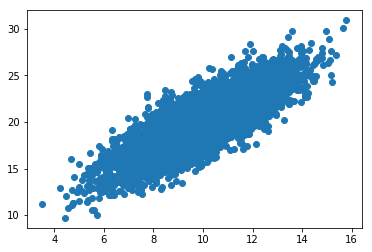

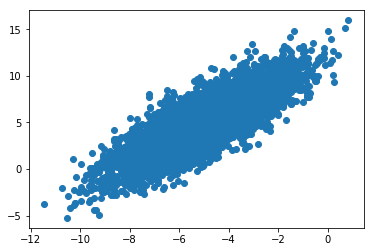

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = np.random.multivariate_normal([10, 20], [[3, 4],[4, 8]], 5000).T
plt.scatter(x[0,:], x[1,:])
plt.show()

center_x = x - np.mean(x)
plt.scatter(center_x[0,:], center_x[1,:])
plt.show()

compute the covariance matrix and compare it to the actual covariance of the distribution

In [246]:
center_x

array([[-4.99253685, -4.52463847, -5.41914898, ..., -6.04757023,
        -4.94598491, -3.38476475],
       [ 8.09139304,  5.61216798,  7.861372  , ...,  5.04675047,
         4.98391445,  6.00457526]])

In [247]:
#actual covariance
print(np.cov(center_x))

#computed covariance
mean = np.mean(center_x.T, 0)
#cited source: https://stackoverflow.com/questions/38177799/numpy-covariance-and-covariance-matrix-by-formula-is-producing-different-results
covMatrix = np.dot(center_x-mean[:, None],(center_x-mean[:, None]).T)/(5000-1)
print(covMatrix)

#return the simple average  np.cov([X, Y], ddof=0)

value, vector = np.linalg.eig(covMatrix)
ei = np.diag(value)

[[ 2.88499988  3.85302295]
 [ 3.85302295  7.72962638]]
[[ 2.88499988  3.85302295]
 [ 3.85302295  7.72962638]]


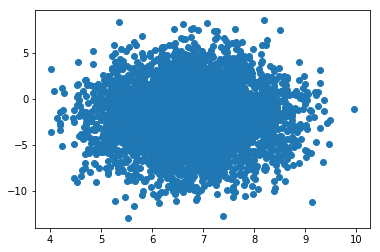

[[ 0.75611688  0.        ]
 [ 0.          9.85850938]]
[[ 1.15002037  0.        ]
 [ 0.          0.31848895]]


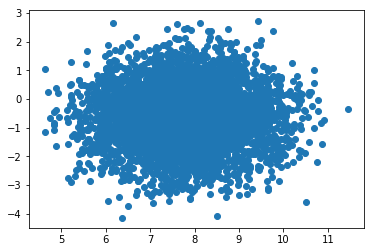

'\nImplication: The data is now mapped to new dimensions. The relationship between x and \ny becomes independent. The covariance matrix acts as the identity matrix, then changes \nthe data into a sphere.\n'

In [248]:
transform_x = np.dot(vector.T, center_x)
plt.scatter(transform_x[0,:], transform_x[1,:])
plt.show()
'''
Implication: This transformed data decorrelates it from the x and y axis. Subsiquently 
changes the variance across each axis to one. Also known as whitening.

'''


eiv = np.diag(value)
print(eiv)
print(np.diag(1/np.diag(eiv ** 0.5)))
transform_x_2 = np.dot(np.diag(1/np.diag(eiv ** 0.5)), transform_x,) #convert to diagnoal
plt.scatter(transform_x_2[0,:], transform_x_2[1,:])
plt.show()

'''
Implication: The data is now mapped to new dimensions. The relationship between x and 
y becomes independent. The covariance matrix acts as the identity matrix, then changes 
the data into a sphere.
'''

In [11]:
a = np.array([1, 2, 3, 4, 5, 6, 7 ,8])
b = (a - np.mean(a)) ** 2
print(np.sum(b)/8)

5.25
